In [142]:
from scipy import optimize
import numpy as np
from scipy import sparse
from numpy.random import rand
from scipy.spatial import Delaunay
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import distance_matrix
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.interpolate import interp1d

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests
import scipy as sp
import pandas as pd

## Библиотека SciPy

### Sparse-матрицы

In [ ]:
np.info(optimize.fmin)

In [5]:
# CSR-матрица
sample_csr = sparse.csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])

row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])

# CSС-матрица
sample_csc = sparse.csc_matrix((data, (row, col)), shape=(3, 3))

I = np.array([0,3,1,0])
J = np.array([0,3,1,2])
V = np.array([4,5,7,9])

# COO-матрица
sample_coo = sparse.coo_matrix((V,(I,J)),shape=(4,4))
# LIL матрица
sample_lil = sparse.lil_matrix((3, 3))

# DOK-матрица
sample_dok = sparse.dok_matrix((5, 5), dtype=np.float32)

In [7]:
sample_lil[0, :3] = np.ones(3)
sample_lil[1, :3] = sample_lil[0, :3]
sample_lil.setdiag(rand(3))

for i in range(5):
    for j in range(5):
        sample_dok [i, j] = i + j

In [9]:
# Переведем в dense и исправим необходимые значения
tmp_filled = sample_csr.toarray()
tmp_filled[0, 0] = 10
sample_csr_new = sparse.csr_matrix(tmp_filled)

# Аналогично через сложение двух матриц
tmp_csr = sparse.csr_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csr_new = sample_csr + tmp_csr

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 5 stored elements and shape (3, 3)>

In [10]:
v = np.array([1, 0, -1])
tmp_csr = sparse.csr_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csr = sample_csr + tmp_csr
sample_csr = sample_csr.dot(v)
v = np.array([1, 0, -1])
tmp_csc = sparse.csc_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csc = sample_csc + tmp_csc
sample_csc = sample_csc.dot(v)

sample_lil_tmp = sparse.lil_matrix((3, 3))
sample_lil = sample_lil.dot(v) + sample_lil_tmp

Создайте матрицу CSR размером 3х4, в которой первый столбец заполнен единицами, а третий — четвёрками. Создайте sparse CSR-матрицу с помощью трёх массивов и запишите в переменную tmp.

In [ ]:
tmp = sparse.csr_matrix(([1, 4, 1, 4, 1, 4], ([0, 0, 1, 1, 2, 2], [0, 2, 0, 2, 0, 2])), shape=(3, 4))
tmp = sparse.csr_matrix(([1, 4, 1, 4, 1, 4], ([0, 0, 1, 1, 2, 2], [1, 3, 1, 3, 1, 3])), shape=(3, 4))
tmp = sparse.csr_matrix(([1, 4, 1, 4, 1, 4], [1, 3, 1, 3, 1, 3], [0, 2, 4, 6]), shape=(3, 4))
tmp = sparse.csr_matrix(([1, 4, 1, 4, 1, 4], [0, 2, 0, 2, 0, 2], [0, 2, 4, 6]), shape=(3, 4))

In [11]:
# матрица от 1 до 6, размером 2х3
sparse.csr_matrix([[1, 2, 3], [4, 5, 6]])

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 6 stored elements and shape (2, 3)>

### Матрицы расстояний

In [13]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])

In [26]:
points = np.array([(12, 1), (7, 17), (7, 3), (10, 12), (14, 15), (1, 2), (13, 11), (17, 16), (5, 18),
(10, 16), (9, 12), (3, 14), (12, 5), (19, 6), (13, 17), (17, 17), (1, 7), (1, 18), (19, 11), (14, 11),
(15, 11), (10, 1), (9, 2), (17, 12), (11, 18), (5, 5), (10, 0), (16, 0), (14, 1), (7, 9), (5, 3), (11,
13), (2, 2), (0, 19), (3, 12), (7, 8), (11, 12), (3, 9), (10, 2), (16, 1), (13, 18), (19, 5), (15, 6),
(17, 8), (8, 6), (10, 19), (19, 10), (16, 16), (11, 0), (6, 12)])

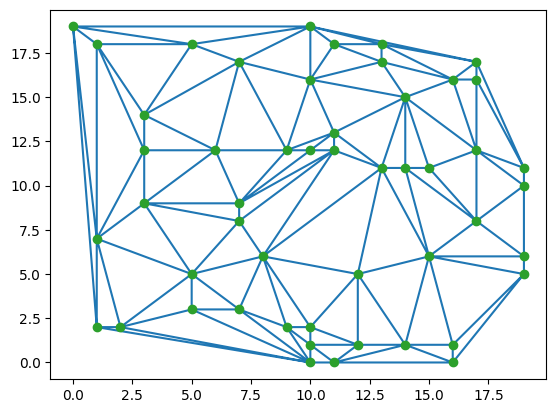

In [27]:
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [29]:
hull = ConvexHull(points)

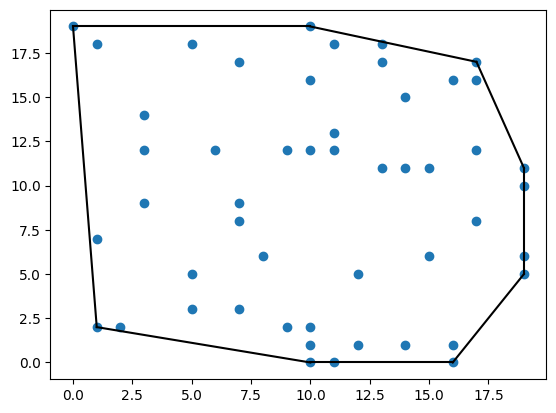

In [30]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

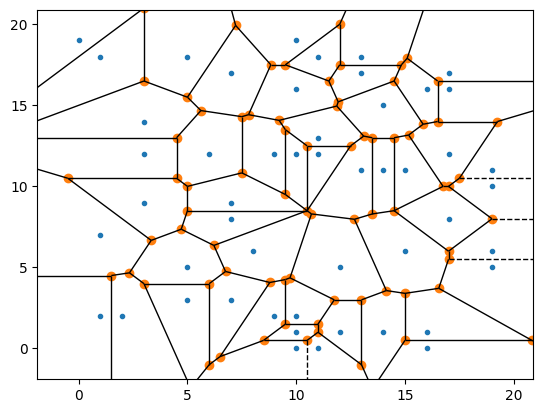

In [31]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [22]:
distance_matrix([[0, 1]], [[1, 2]], p=2)

array([[1.41421356]])

In [23]:
distance_matrix([[0, 1], [0, 1]], [[1, 2], [0, 1]], p=3)

array([[1.25992105, 0.        ],
       [1.25992105, 0.        ]])

In [32]:
points_1 = [(0, 0), (28, 13), (21, 24), (5, 17), (13, 8)]
points_2 = [(2, 17), (6, 6), (8, 25), (13, 28), (19, 15)]
distance_matrix(points_1, points_2, p=5)

array([[17.00007663,  6.89219013, 25.01675474, 28.119784  , 20.04414717],
       [26.00044815, 22.01433058, 20.30179359, 17.23047532,  9.00097525],
       [19.02572349, 19.25814812, 13.000007  ,  8.04938647,  9.00097525],
       [ 3.        , 11.00001366,  8.01183019, 11.41508815, 14.00016659],
       [11.7091133 ,  7.00266353, 17.00747657, 20.        ,  7.55313029]])

### Задачи оптимизации

In [34]:
def function_to_minimize(x):
    return x[0]**3 + 4 * x[0]**2 + 10 + 30*x[1]**2

In [35]:
# Симплекс-метод
x0 = np.array([1, 3])
res = minimize(function_to_minimize, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 10.000000
         Iterations: 81
         Function evaluations: 155


In [36]:
# BFGS
res = minimize(function_to_minimize, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})

         Current function value: -645910098997.281128
         Iterations: 2
         Function evaluations: 351
         Gradient evaluations: 113


C:\Users\anzel\AppData\Local\Temp\ipykernel_11452\1312777196.py:2: OptimizeWarning: Unknown solver options: xatol
  res = minimize(function_to_minimize, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})
c:\Users\anzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
def linear(x):
    return x[0]
res = minimize(linear, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
res = minimize(linear, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})

In [40]:
bounds = Bounds ([-10, 0], [10, 100.0])

In [42]:
linear_constraint = LinearConstraint ([[1, 1]], [42], [42])

In [43]:
def func(x):
    return x[0]**3 - 5*x[1]**2 -5

In [44]:
x0 = np.array([0.5, 0])
res = minimize(func, x0, method='trust-constr', constraints=[linear_constraint],
        options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 10, function evaluations: 27, CG iterations: 8, optimality: 9.44e-12, constraint violation: 0.00e+00, execution time: 0.043 s.


In [45]:
res = minimize(func, x0, method='SLSQP', constraints=[linear_constraint],
            bounds=bounds)

In [53]:
def func(x):
    return x[0]**5 - x[0]**4 + x[0]**3 - x[0]**2

x0 = np.array([0, 0])
res = minimize(func, x0, method='Powell', options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -0.220559
         Iterations: 2
         Function evaluations: 31


C:\Users\anzel\AppData\Local\Temp\ipykernel_11452\761295824.py:5: OptimizeWarning: Unknown solver options: xatol
  res = minimize(func, x0, method='Powell', options={'xatol': 1e-8, 'disp': True})


In [58]:
def func(x):
    return -np.cos(x[0]) + x[0]**4 - x[0]**3 + np.sin(x[0])

x0 = np.array([0, 0])
res = minimize(func, x0, method='Powell', options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -1.224726
         Iterations: 2
         Function evaluations: 32


C:\Users\anzel\AppData\Local\Temp\ipykernel_11452\22935280.py:5: OptimizeWarning: Unknown solver options: xatol
  res = minimize(func, x0, method='Powell', options={'xatol': 1e-8, 'disp': True})


In [59]:
def func(x):
    return np.cos(x[0]) - x[0]**3 +x[0]**2 - np.sin(x[0])
bounds = Bounds ([-2], [2])

x0 = np.array([0, 0])
res = minimize(func, x0, method='Powell', options={'xatol': 1e-8, 'disp': True},
               bounds=bounds)

Optimization terminated successfully.
         Current function value: -5.325153
         Iterations: 2
         Function evaluations: 138


C:\Users\anzel\AppData\Local\Temp\ipykernel_11452\3023684111.py:6: OptimizeWarning: Unknown solver options: xatol
  res = minimize(func, x0, method='Powell', options={'xatol': 1e-8, 'disp': True},


### Интерполяция

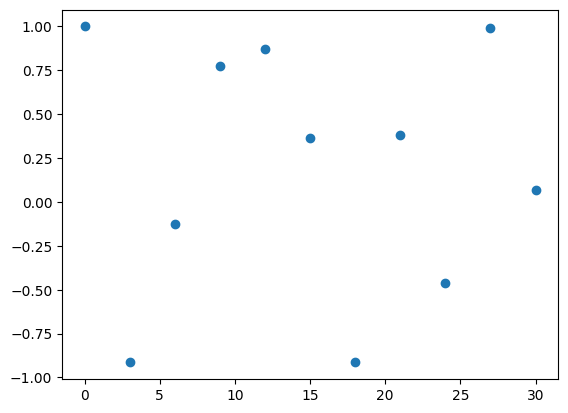

In [61]:
x = np.linspace(0, 30, num=11, endpoint=True)
y = np.cos(-x**2)

plt.plot(x, y, 'o')

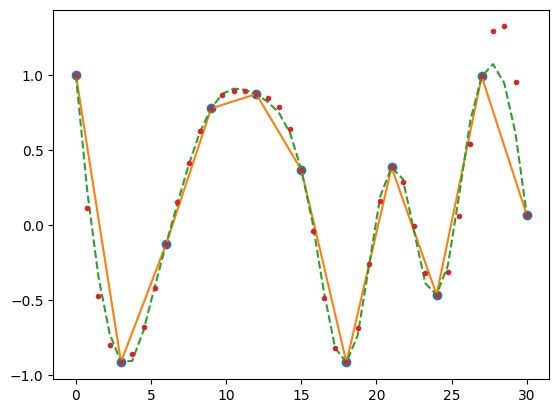

In [81]:
xnew = np.linspace(0, 30, num=41, endpoint=True)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.')
plt.show()

In [99]:
xnew = np.array([(0.0, -0.0), (1.0, -1.5574077246549023), (2.0, -1.1578212823495777), 
(3.0, 0.45231565944180985), (4.0, -0.3006322420239034), (5.0, 0.13352640702153587),
(6.0, -7.750470905699148), (7.0, 3.172908552159191), (8.0, -2.3478603091954366), 
(9.0, 0.8109944158318942), (10.0, 0.5872139151569291)])
x = [i[0] for i in xnew]
y = [i[1] for i in xnew]
f = interp1d(x, y)
f(5.5).round(2)
f = interp1d(x, y, kind='quadratic')
f(4.5).round(2)

0.68

## Статистические тесты

### Тесты на среднее и доли

In [105]:
np.random.seed(13)
random_normal = np.random.normal(5, 2, 100)
random_bin = np.random.choice([0, 1], size=(100,), p=[0.8, 0.2])

In [106]:
stats.ttest_1samp(random_normal, 0.0)

TtestResult(statistic=27.315846581411247, pvalue=6.762242033211871e-48, df=99)

In [107]:
stats.ttest_1samp(random_normal, 5.0)

TtestResult(statistic=0.6236095710595042, pvalue=0.5343182132984923, df=99)

In [109]:
# тест на равенство доли единиц во второй выборке 0.5
stats.binomtest(k=sum(random_bin), n=(len(random_bin) - sum(random_bin)), p=0.5)

BinomTestResult(k=20, n=80, alternative='two-sided', statistic=0.25, pvalue=8.580559867049611e-06)

In [110]:
stats.binomtest(k=sum(random_bin), n=(len(random_bin) - sum(random_bin)), p=0.2)

BinomTestResult(k=20, n=80, alternative='two-sided', statistic=0.25, pvalue=0.26401278555340046)

In [111]:
random_normal_5 = np.random.normal(5, 2, 100)
random_normal_false = np.random.normal(7, 2, 100)

In [113]:
stats.ttest_ind(random_normal_5, random_normal)

TtestResult(statistic=-1.109776693013421, pvalue=0.2684412714449198, df=198.0)

In [112]:
stats.ttest_ind(random_normal_false, random_normal)

TtestResult(statistic=7.56418694452888, pvalue=1.4333446457467145e-12, df=198.0)

In [115]:
random_bin_2 = np.random.choice([0, 1], size=(100,), p=[0.8, 0.2])
random_bin_false = np.random.choice([0, 1], size=(100,), p=[0.6, 0.4])

In [116]:
proportions_ztest(count=[sum(random_bin), sum(random_bin_2)], nobs=[len(random_bin), len(random_bin_2)])

(-0.5163595320566151, 0.6056033242983083)

In [117]:
proportions_ztest(count=[sum(random_bin), sum(random_bin_false)], nobs=[len(random_bin), len(random_bin_false)])

(-2.5197631533948477, 0.011743382301172597)

In [119]:
np.random.seed(13)
random_bin = np.random.choice([0, 1], size=(100,), p=[0.7, 0.3])
stats.binomtest(k=sum(random_bin), n=(len(random_bin) - sum(random_bin)), p=0.1)

BinomTestResult(k=28, n=72, alternative='two-sided', statistic=0.3888888888888889, pvalue=8.793398454917675e-11)

In [120]:
np.random.seed(21)
random_normal = np.random.normal(18, 20, 100)
stats.ttest_1samp(random_normal, 3.0)

TtestResult(statistic=7.974042103707906, pvalue=2.7279794218267574e-12, df=99)

In [121]:
np.random.seed(21)
random_normal = np.random.normal(18, 20, 10)
stats.ttest_1samp(random_normal, 7.0)

TtestResult(statistic=1.6748822466424405, pvalue=0.12827924668031368, df=9)

### Тесты на нормальность

In [123]:
np.random.seed(13)
random_normal = np.random.normal(5, 2, 100)
random_uniform = np.random.uniform(0, 1, 100)

In [125]:
stats.shapiro(random_normal)

ShapiroResult(statistic=0.9897643468746817, pvalue=0.6455599791405382)

In [124]:
stats.shapiro(random_uniform)

ShapiroResult(statistic=0.9223205486897722, pvalue=1.8727311444297305e-05)

In [126]:
stats.kstest(random_normal, 'norm')

KstestResult(statistic=0.933371471007256, pvalue=4.646377515900967e-118, statistic_location=2.476788109361862, statistic_sign=-1)

In [127]:
stats.kstest(random_uniform, 'norm')

KstestResult(statistic=0.5039276991503323, pvalue=4.9262358819103416e-24, statistic_location=0.00984544079968852, statistic_sign=-1)

In [128]:
stats.kstest((random_normal - np.mean(random_normal)) / np.std(random_normal), 'norm')

KstestResult(statistic=0.06562034353090856, pvalue=0.7572142037683822, statistic_location=-0.40053934145643744, statistic_sign=1)

In [129]:
np.random.seed(2)
random_normal = np.random.normal(2, 4, 10)
stats.shapiro(random_normal)

ShapiroResult(statistic=0.9548438589729802, pvalue=0.7258625093629594)

In [130]:
np.random.seed(2)
random_normal = np.random.normal(2, 4, 10)
stats.kstest(random_normal, 'norm')

KstestResult(statistic=0.514185695796664, pvalue=0.005575825333255893, statistic_location=-1.366989462624816, statistic_sign=1)

In [131]:
np.random.seed(2)
random_normal = np.random.normal(2, 4, 10)
stats.kstest((random_normal - np.mean(random_normal)) / np.std(random_normal), 'norm')

KstestResult(statistic=0.17907654022324243, pvalue=0.8514658527102467, statistic_location=-0.19953160960160207, statistic_sign=1)

### Множественная проверка гипотез

In [139]:
np.random.seed(2)
pvals = np.random.uniform(0, 0.3, 100)

In [140]:
pvals_corrected = multipletests(pvals, method="holm")

### Статистические тесты и бизнес-интерпретация результатов

In [143]:
df_train = pd.read_csv("train.csv", index_col="PassengerId")
df_test = pd.read_csv("test.csv", index_col="PassengerId")

In [144]:
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.00

In [148]:
male_survived = df_train[df_train['Sex']=='male']['Survived'].sum()
male_num = len(df_train[df_train['Sex']=='male']['Survived'])
female_survived = df_train[df_train['Sex']=='female']['Survived'].sum()
female_num = len(df_train[df_train['Sex']=='female']['Survived'])
proportions_ztest(count=[male_survived, female_survived], nobs=[male_num , female_num])

(-16.218833930670097, 3.7117477701134797e-59)

In [149]:
df_cleared = df_train.dropna()
survived_ages = df_cleared[df_cleared['Survived']==1]['Age'].values
died_ages = df_cleared[df_cleared['Survived']!=1]['Age'].values
sp.stats.ttest_ind(died_ages, survived_ages, alternative="greater")

TtestResult(statistic=3.53435125095576, pvalue=0.0002594751653940835, df=181.0)

In [160]:
df_cleared['age_group'] = df_cleared.loc[: ,'Age'].apply(lambda x: x//10)
p_vals = []
coeffs = []
age_groups = df_cleared['age_group'].unique()
for i in range(len(age_groups)):
    age_group_1_sum = df_cleared[df_cleared['age_group']==age_groups[i]]['Survived'].sum()
    age_group_1_count = len(df_cleared[df_cleared['age_group']==age_groups[i]])
    for j in range(i+1, len(age_groups)):
        age_group_2_sum = df_cleared[df_cleared['age_group']==age_groups[j]]['Survived'].sum()
        age_group_2_count = len(df_cleared[df_cleared['age_group']==age_groups[j]])
        p_value = proportions_ztest(count=[age_group_1_sum, age_group_2_sum], nobs=[age_group_1_count, age_group_2_count])[1]
        p_vals.append(p_value)
        coeffs.append(age_groups[j])
p_vals_corrected = multipletests(p_vals, method="bonferroni")[1]

for i, pval in enumerate(p_vals_corrected):
    if pval < 0.05:
        print(coeffs[i])

C:\Users\anzel\AppData\Local\Temp\ipykernel_11452\2490027063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared['age_group'] = df_cleared.loc[: ,'Age'].apply(lambda x: x//10)


In [168]:
stats.ttest_ind(df_train.Age.dropna(), df_test.Age.dropna())

TtestResult(statistic=-0.5987733746796555, pvalue=0.5494539128955762, df=1044.0)

In [177]:
proportions_ztest(count=[df_train[df_train.Sex=='male'].shape[0], df_test[df_test.Sex=='male'].shape[0]], nobs=[df_train.shape[0], df_test.shape[0]])

(0.39537787824896614, 0.6925640325233131)

In [ ]:
#1
stats.ttest_ind(df_train[df_train.Pclass==1].Age.dropna(), df_train[df_train.Pclass==2].Age.dropna())

TtestResult(statistic=5.485187676773201, pvalue=7.835568991415144e-08, df=357.0)

In [192]:
#2
df_1 = df_train[df_train.Pclass==1]
proportions_ztest(count=[df_1[df_1.Sex=='male'].shape[0], df_1[df_1.Sex=='female'].shape[0]], nobs=[df_1.shape[0], df_1.shape[0]])

(2.6943012562182527, 0.007053637888068598)